# Testing if kernel is detecting GPU or not

In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [61]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11800171827408579934
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2254700544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2189729808349175470
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

# Testing CUDA support

In [62]:
tf.test.is_built_with_cuda()

True

# Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from keras.optimizers import Adam, RMSprop, SGD, Adamax
from PIL import Image
import scipy

# Specifying dataset paths

In [64]:
train_dir = "D:/Miscellaneous/J-comp/MLA/FER/train"
test_dir = "D:/Miscellaneous/J-comp/MLA/FER/test"

In [65]:
#Image size
img_size = 48

# Data Augmentation
- width_shift_range = shifts the image randomly to the right or left along the width of the image
- height_shift range = shifts image randomly to up or below along the height of the image
- horizontal_flip = flips the image horizontally
- rescale = to scale down the pizel values in our image between 0 and 1
- validation_split = reserves some images to be used for validation purpose

In [66]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

### Applying data augmentation to the images as we read them from their respective directories

In [67]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


# Model Specifications

In [68]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [1]:
epochs = 60
batch_size = 64

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 128)      

# Training our model

In [71]:
history = model.fit(x = train_generator, epochs = epochs, validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - ETA: 0s - batch: 179.0000 - size: 63.9777 - loss: 9.3158 - accuracy: 0.1923

C:\Users\L3NOVO\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


359/359 [==============================] - 199s 543ms/step - batch: 179.0000 - size: 63.9777 - loss: 9.3158 - accuracy: 0.1923 - val_loss: 9.1477 - val_accuracy: 0.1718
Epoch 2/60
359/359 [==============================] - 125s 349ms/step - batch: 179.0000 - size: 63.9777 - loss: 8.2710 - accuracy: 0.2268 - val_loss: 7.6017 - val_accuracy: 0.2772
Epoch 3/60
359/359 [==============================] - 37s 103ms/step - batch: 179.0000 - size: 63.9777 - loss: 7.2616 - accuracy: 0.2496 - val_loss: 6.6600 - val_accuracy: 0.2689
Epoch 4/60
359/359 [==============================] - 37s 102ms/step - batch: 179.0000 - size: 63.9777 - loss: 6.2824 - accuracy: 0.2802 - val_loss: 5.8702 - val_accuracy: 0.2772
Epoch 5/60
359/359 [==============================] - 37s 102ms/step - batch: 179.0000 - size: 63.9777 - loss: 5.3918 - accuracy: 0.3114 - val_loss: 4.8853 - val_accuracy: 0.3527
Epoch 6/60
359/359 [==============================] - 37s 102ms/step - batch: 179.0000 - size: 63.9777 - loss: 4.6

# Visualising training metrics

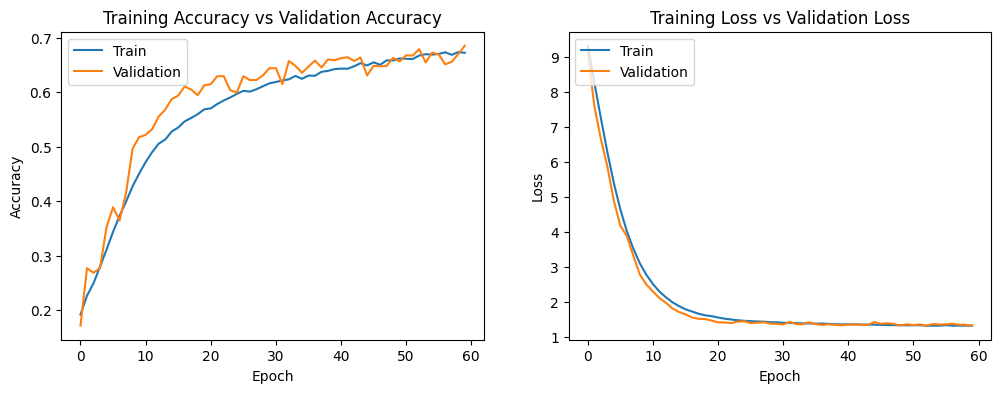

In [72]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Saving our model for future use

In [73]:
model.save('fer_optimal.h5')

### Determing final training accuracy and saving the weights

In [74]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

final train accuracy = 73.72 , validation accuracy = 68.51


In [75]:
model.save_weights('fer_weights.h5')

# Model test
### Loading our model from saved file

In [9]:
loaded_model = keras.models.load_model("C:/Users/L3NOVO/AppData/Roaming/jupyter/kernels/mlajcomp/fer_optimal.h5")

### Testing on preprocessed image

1/1 [==============================] - 0s 157ms/step
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Emotion: Happy


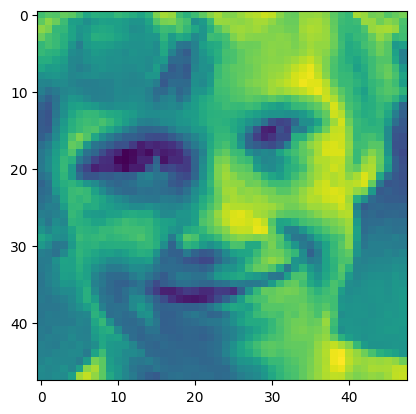

In [10]:
labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}
test_image = tf.keras.utils.load_img("D:/Miscellaneous/J-comp/MLA/FER/test/happy/PrivateTest_21515821.jpg", target_size=(48, 48), color_mode="grayscale")
test_image = np.array(test_image)
plt.imshow(test_image)
full_test_image = np.expand_dims(test_image, axis=0)
test_image = test_image.reshape(1, 48, 48, 1)
yhat = loaded_model.predict(test_image)
yhat = list(yhat[0])
print(yhat)
img_index = yhat.index(max(yhat))
emotion = labels[img_index]
print("Emotion: "+emotion)

### Testing our model on a random picture after preprocessing the image.
### Preprocessing involves:-
- Resizing and converting the random image to **grayscale**
- Detecting face using a **Haar-cascade classifier**

Image loaded
1/1 [==============================] - 0s 32ms/step
[0.0, 0.0, 5.07899e-34, 0.0, 0.0, 0.0, 1.0]
Emotion: Surprise


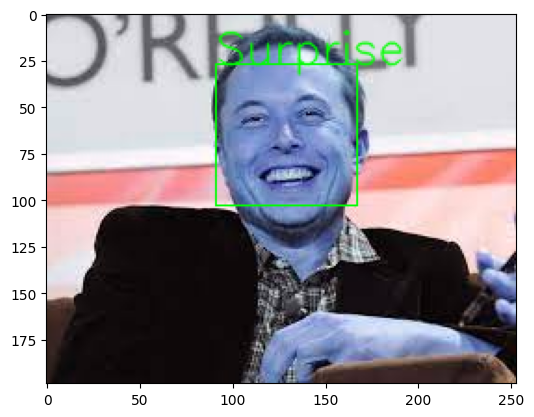

In [11]:
WIDTH = 48
HEIGHT = 48
x=None
y=None

test_path = "C:/Users/L3NOVO/Downloads/"
full_test_image = cv2.imread(test_path+"elon4.jpeg")
#full_test_image = cv2.resize(full_test_image, width=1000)
print("Image loaded")
gray = cv2.cvtColor(full_test_image, cv2.COLOR_BGR2GRAY)
face = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
faces = face.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x::x+w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
    cv2.rectangle(full_test_image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    yhat = loaded_model.predict(cropped_img)
    yhat = list(yhat[0])
    print(yhat)
    img_index = yhat.index(max(yhat))
    emotion = labels[img_index]
    cv2.putText(full_test_image, emotion, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
    print("Emotion: "+emotion)

plt.imshow(full_test_image)